In [12]:
# read plain mnist as training
# test on morph mnist

In [1]:
import pandas as pd
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision.utils import make_grid
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import os

from scipy.ndimage import gaussian_filter

In [3]:
train = pd.read_csv('C:/Users/joele/OneDrive/CMIC hackathon/data/mnist_train.csv')
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train_df = train.iloc[:,1:]
y_train_df = train.iloc[:,0]

print(x_train_df.shape, y_train_df.shape)

(60000, 784) (60000,)


In [5]:
x_train = x_train_df.values/255.
y_train = y_train_df.values
x_train = np.reshape(x_train, (60000,1,28,28))

x_train_binary = x_train_df.values
x_train_binary = np.reshape(x_train_binary, (60000,1,28,28))

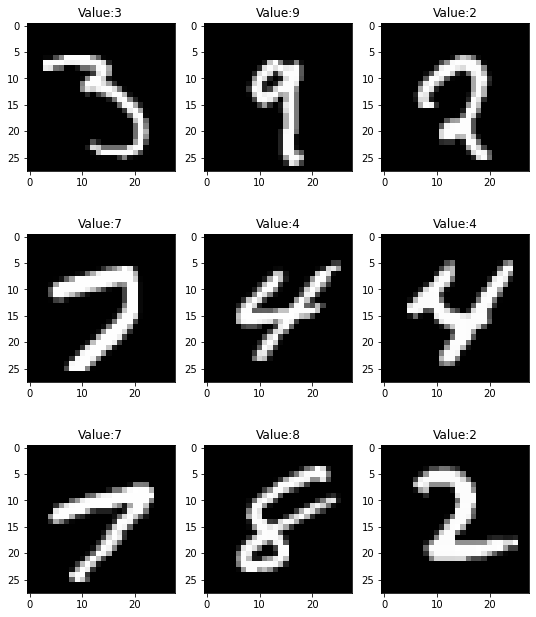

In [6]:
def display(rows, columns, images, values=[], predictions=[]):
    fig = plt.figure(figsize=(9, 11))

    ax = []

    for i in range(columns*rows):
        img = images[i]
        ax.append(fig.add_subplot(rows, columns, i+1))
        
        title = ""
        
        if(len(values) == 0):
            title = "Pred:" + str(predictions[i])
        elif(len(predictions) == 0):
            title = "Value:" + str(values[i])
        elif(len(values) != 0 and len(predictions) != 0):
            title = "Value:" + str(values[i]) + "\nPred:" + str(predictions[i])
        
        ax[-1].set_title(title)  # set title
        plt.imshow(img, cmap='gray', vmin=0, vmax=1)

    plt.show()

r = 3
c = 3
idx = np.random.randint(1, 1000, size=r*c)

images = x_train[idx,:]
images = images[:,0]

values = y_train[idx]

display(rows=r, columns=c, images=images, values=values, predictions=[])

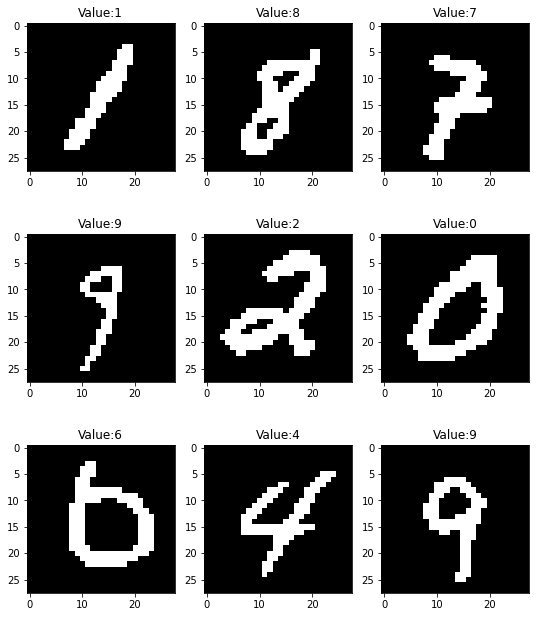

In [27]:
labels = np.copy(images)
labels[labels >= 0.4] = 1
labels[labels < 0.4] = 0

display(rows=r, columns=c, images=labels, values=values, predictions=[])

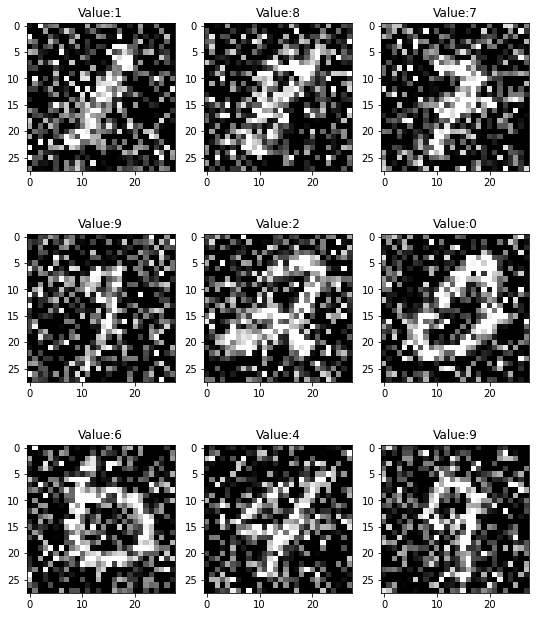

In [28]:
noise = np.random.normal(0, 0.5, images.shape)
mask_overflow_upper = images + noise >= 1.0
mask_overflow_lower = images + noise < 0.0
noise[mask_overflow_upper] = 1.0
noise[mask_overflow_lower] = 0.0
images_gaussian = images + noise
display(rows=r, columns=c, images=images_gaussian, values=values, predictions=[])

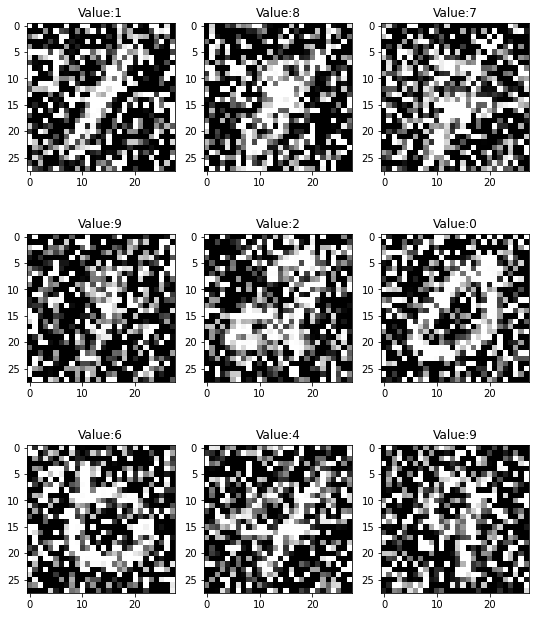

In [29]:
noise = np.random.normal(0, 1.0, images.shape)
mask_overflow_upper = images + noise >= 1.0
mask_overflow_lower = images + noise < 0.0
noise[mask_overflow_upper] = 1.0
noise[mask_overflow_lower] = 0.0
images_gaussian = images + noise
display(rows=r, columns=c, images=images_gaussian, values=values, predictions=[])

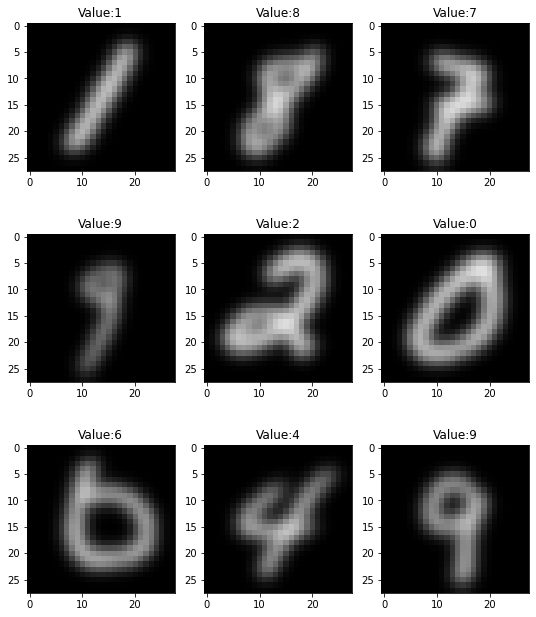

In [48]:
blurred = gaussian_filter(images, sigma=(0, 1.5, 1.5))
display(rows=r, columns=c, images=blurred, values=values, predictions=[])

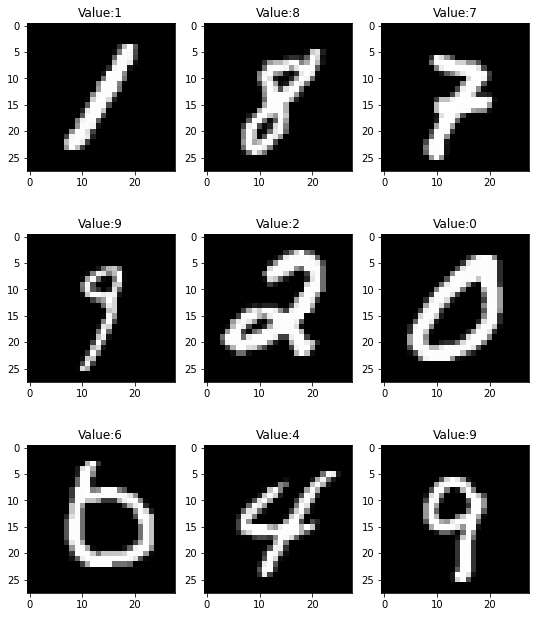

In [46]:
# Check. These should be the originals!
display(rows=r, columns=c, images=images, values=values, predictions=[])